<a href="https://colab.research.google.com/github/DiemenMemen/ME4707/blob/master/tarea_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1: Visión Computacional

ME4707 - Robótica - Semestre 2020-2

Profesor: Juan C. Zagal - Auxiliar: Cristián Herrera - Laboratorios: Gaspar Fábrega

# Instalación
## 1. Google Colab
En esta tarea, que se trabajará durante los laboratorios computacionales 1, 2, 3 y 4, se utilizará Python 3 y la librería de visión computacional OpenCV. La forma más fácil de tener un ambiente de desarrollo de Python con todas las bibliotecas más comunes es utilizar **Google Colaboratory**. Colaboratory es un entorno Jupyter notebook gratuito que se ejecuta completamente en la nube. Puede escribir y ejecutar código, solo requiere de una cuenta google.

https://colab.research.google.com/notebooks/welcome.ipynb

Debe trabajar sobre este mismo archivo .ipynb completando lo que se solicita en cada problema.

## 2. OpenCV
En esta tarea se utilizará principalmente **OpenCV**. La Open Surce Computer Vision es una librería especializada en herramientas de visión computacional y en todo lo que respecta a visión artificial en general. De este modo provee de funcionalidades de todo tipo de complejidad, desde operaciones básicas de procesamiento de imágenes, hasta algoritmos de reconocimiento de objetos.

<img src="https://raw.githubusercontent.com/cherrerab/roboticafcfm/master/auxiliar_01/bin/opencv_logo.png" height="200">

Por supuesto, esta librería cuenta con su documentación correspondiente. En esta puede encontrar descripciones más detalladas de sus funcionalidades, así como también ejemplos, tutoriales y otros.

https://docs.opencv.org/master/

Si bien OpenCV se encuentra instalada por defecto en Colab bajo el nombre de `cv2`, en esta tarea requerirá herramientas que por temas de patente no se encuentran disponibles directamente en esta librería. Por esto, instalaremos una librería complementaria `opencv_contrib` en su version `3.3.0.10`.


In [2]:
# instalar version 3.3
!pip install opencv-python==3.3.0.10 
!pip install opencv-contrib-python==3.3.0.10

# importar opencv
import cv2

     |████████████████████████████████| 15.5MB 248kB/s 
ERROR: dopamine-rl 1.0.5 has requirement opencv-python>=3.4.1.15, but you'll have opencv-python 3.3.0.10 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 21.4MB 1.4MB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


##3. Imágenes

Para facilitar la carga de los archivos necesarios para completar la tarea, se ha habilitado un directorio en el github del curso `roboticafcfm`. Para clonar el repositorio en el entorno de Colab solo debe ejecutar el siguiente bloque de código.

In [3]:
!git clone https://github.com/cherrerab/roboticafcfm.git
%cd /content/roboticafcfm

Cloning into 'roboticafcfm'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 187 (delta 15), reused 0 (delta 0), pack-reused 137
Receiving objects: 100% (187/187), 10.81 MiB | 13.10 MiB/s, done.
Resolving deltas: 100% (45/45), done.
/content/roboticafcfm


# Problema 1



## Parte 1
Como se ha visto en las clases del curso, las imágenes digitales consisten en arreglos discretos de valores numéricos, donde cada valor define la intensidad de iluminación que posee un punto `pixel` específico en la imagen.

Por ejemplo, cargue la imagen `balls.jpg` e imprima las dimensiones de esta. Esto lo puede hacer mediante el siguiente código:

In [5]:
# el módulo matplotlib.plt nos permite visualizar las imágenes
# el módulo numpy contiene herramientas para arreglos numéricos
from matplotlib import pyplot as plt
import numpy as np
import cv2

# para leer una imagen, hay que ingresar su ubicación en la función cv2.imread
img = cv2.imread('tarea_01//images//balls.jpg')

# las dimensiones de la imagen pueden ser obtenidas utilizando el atributo .shape
print('la imagen balls.jpg tiene dimensiones: ', img.shape )

la imagen balls.jpg tiene dimensiones:  (640, 640, 3)


Se puede notar que la imagen es un arreglo/matriz de 3 dimensiones `640x640x3`. En este caso, el primer valor corresponde a la altura `height` de la imagen, el segundo al ancho `width` de esta, y el último a la cantidad de canales que posee. Así, se trata de una imagen de 640x640 de 3 canales RGB.

Ahora, al cargar imágenes utilizando cv2.imread estas son cargadas como BGR y no RGB, por lo que los canales están mal asignados. Para corregir esto existe la función `cv2.cvtColor` con la cual es posible cambiar el colorspace de la imagen.

(-0.5, 639.5, 639.5, -0.5)

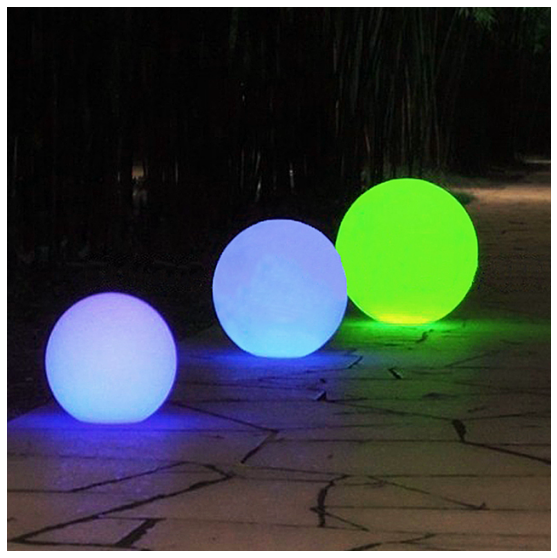

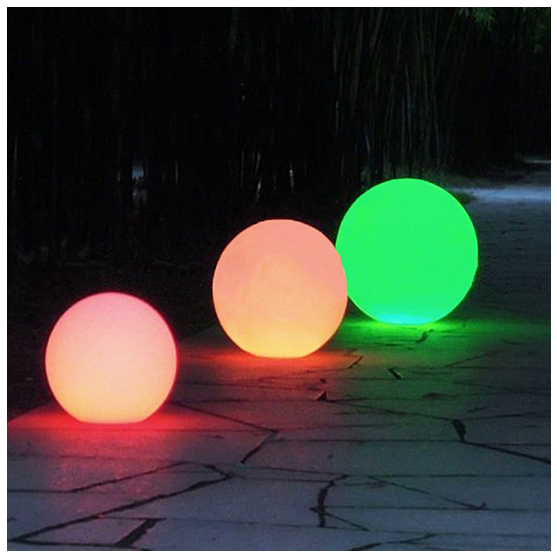

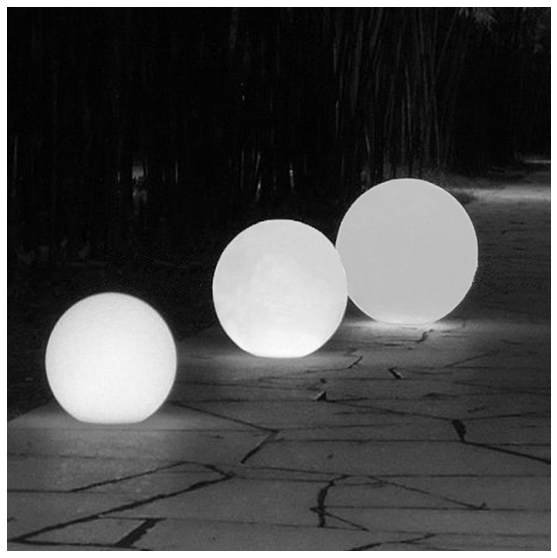

In [7]:
# leer imagen
img = cv2.imread('tarea_01//images//balls.jpg')

# mostrar imagen en BGR
fig = plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')

# corregir a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# mostrar imagen en RGB (correcta)
fig = plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')

# también se puede convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(10, 10))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

Como se puede ver, la imagen consiste principalmente en 3 bolas de luz (dos rojas y una de color verde). No obstante, existe bastante contenido adicional que no parece muy relevante y que podría ser removido. Así, se podría procesar la imagen de tal manera de aislar las bolas tal como se muestra en la imagen `balls_masked.png`.

Para lograr lo anterior se puede generar una máscara `mask` a partir de una imagen binarizada y multiplicar esta con la imagen original. Una forma de binarizar una imagen es utilizando la función `cv2.inRange(img, umbral, 255)`. También se puede utilizar la función `cv2.threshold`.

(-0.5, 639.5, 639.5, -0.5)

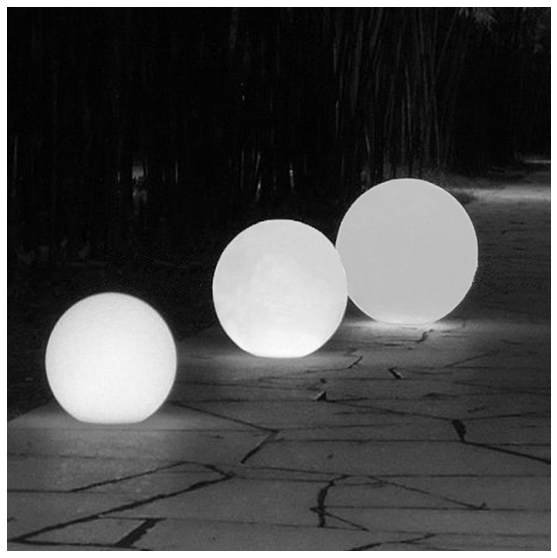

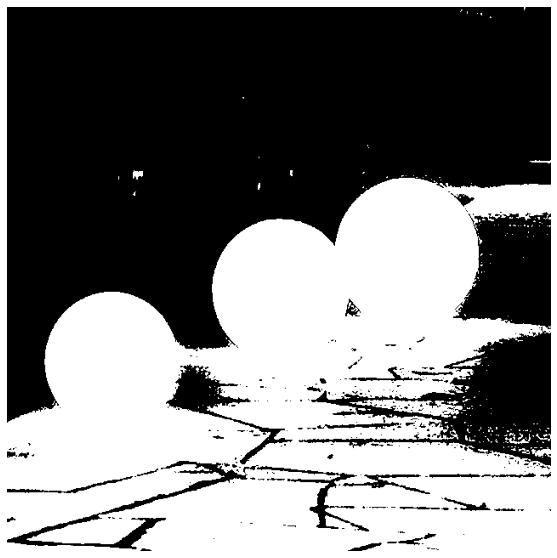

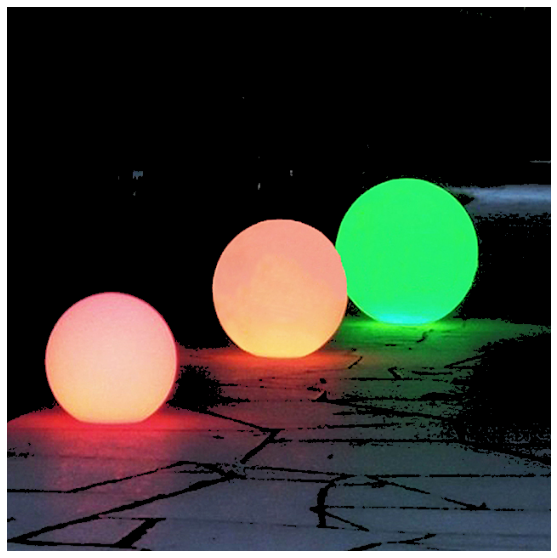

In [8]:
# leer imagen
img = cv2.imread('tarea_01//images//balls.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(10, 10))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

# binarizar con cv2.inRange (los valores de la máscara deben estar entre 0 y 1)
mask = cv2.inRange(img_gray, 50, 255)
mask = mask/255

fig = plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')
plt.axis('off')

# multiplicar máscara con imagen original
img_mask = np.zeros_like(img)

for c in range(img_mask.shape[2]):
  img_mask[:,:,c] = np.multiply(img[:,:,c], mask)

fig = plt.figure(figsize=(10, 10))
plt.imshow(img_mask)
plt.axis('off')


En el ejemplo anterior no se lograron aislar por completo las bolas de luz debido a que el umbral seleccionado en la binarización no es el adecuado. Un método para determinar este umbral es analizando el histograma de la imagen.

Los histogramas de una imagen, corresponden a la representación gráfica de la distribución de las intensidades al interior de la imagen. Estos pueden ser generados utilizando la función `plt.hist(array, bins)`, donde el parámetro `array` consiste en el `np.array` a procesar, mientras que `bins` determina la discretización del histograma.

(a) Convierta la imagen a escala de grises y visualice su histograma (cree una nueva figura para esto y utilice la función `plt.hist` sobre `img.flatten()`). A partir del histograma, determine el umbral adecuado para la máscara y genere la imagen con las esféras aisladas.

(-0.5, 639.5, 639.5, -0.5)

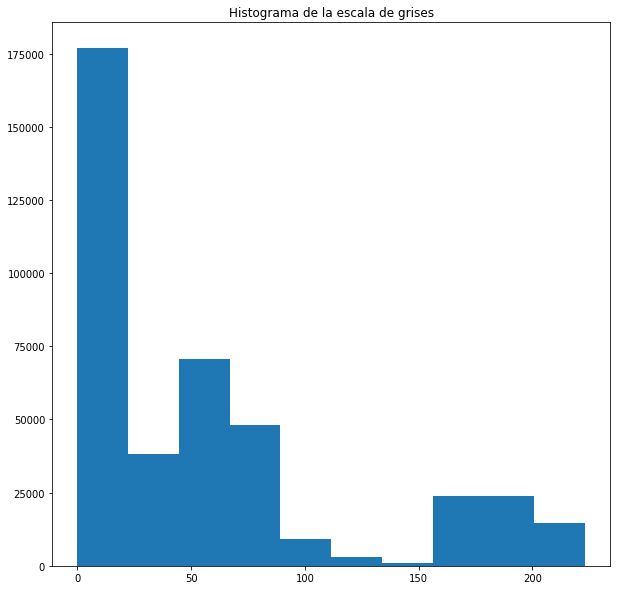

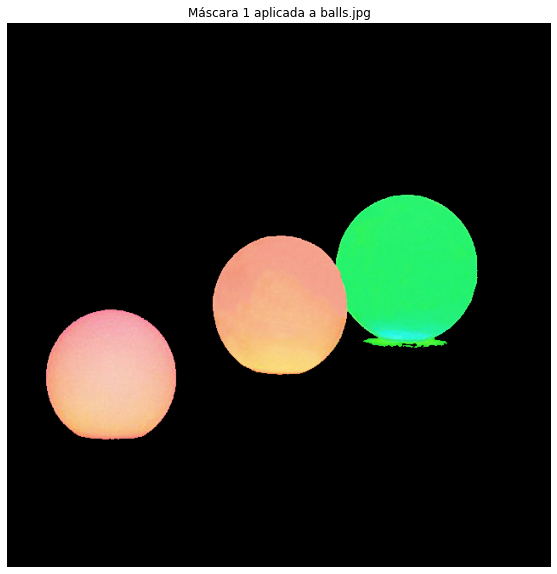

In [37]:
# RESPUESTA PREGUNTA 1 PARTE 1.a

# 1. leer la imagen (RGB)

img = cv2.imread('tarea_01//images//balls.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. convertir a escala de grises

gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

# 3. plotear histograma de la imagen en escala de grises

gray_flat = gray.flatten()
fig = plt.figure(figsize=(10, 10))
plt.hist(gray_flat)
plt.title("Histograma de la escala de grises")

# 4. crear máscara binaria a partir del umbral del histograma

#A partir del histograma se decide que el umbral es 150
pre_mask=cv2.inRange(gray, 150, 255)
mask=pre_mask/255

# 5. multiplicar imagen original con máscara y visualizar

img_mask = np.zeros_like(rgb)

for i in range(img_mask.shape[2]):
  img_mask[:,:,i] = np.multiply(rgb[:,:,i], mask)

fig = plt.figure(figsize=(10, 10))
plt.imshow(img_mask)
plt.title("Máscara 1 aplicada a balls.jpg")
plt.axis('off')


b) Suponga que ahora solo desea segmentar la esfera de color verde. Sobre la imagen RGB elija el canal correspondiente y obtenga una nueva máscara correspondiente al requisito anterior.

(-0.5, 639.5, 639.5, -0.5)

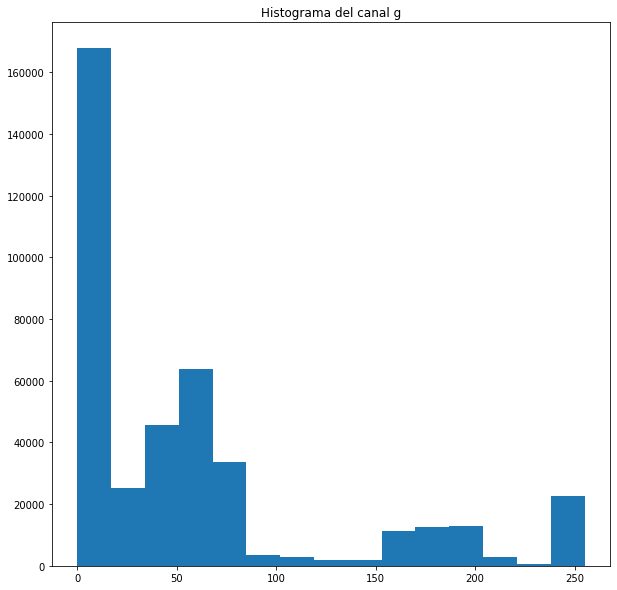

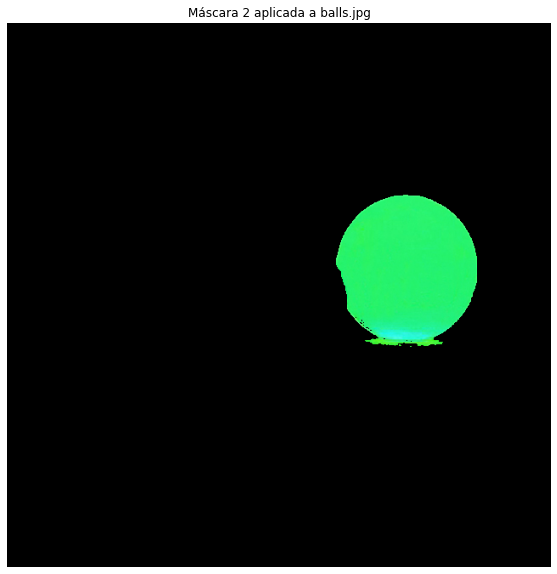

In [38]:
# RESPUESTA PREGUNTA 1 PARTE 1.b

# 1. leer la imagen (RGB)

img = cv2.imread('tarea_01//images//balls.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. seleccionar canal de la imagen

green = rgb[:, :, 1]

# 3. plotear histograma del canal

green_flat = green.flatten()
fig = plt.figure(figsize=(10, 10))
plt.hist(green_flat,15)
plt.title("Histograma del canal g")

# 4. crear máscara binaria a partir del umbral del histograma

#En el histograma se ven tres zonas: oscuridad, bolas rojas y bola verde
#se decide un umbral de 230
pre_mask=cv2.inRange(green, 235, 255)
mask=pre_mask/255

# 5. multiplicar imagen original con máscara y visualizar

img_mask = np.zeros_like(rgb)

for i in range(img_mask.shape[2]):
  img_mask[:,:,i] = np.multiply(rgb[:,:,i], mask)

fig = plt.figure(figsize=(10, 10))
plt.imshow(img_mask)
plt.title("Máscara 2 aplicada a balls.jpg")
plt.axis('off')

## Parte 2

Parte importante en el procesamiento de imágenes digitales es la aplicación de transformaciones (lineales y no-lineales) sobre los valores numéricos de estas. Para introducir esta idea, considere el siguiente problema sobre la imagen en escala de grises `old.jpg`.

(-0.5, 224.5, 224.5, -0.5)

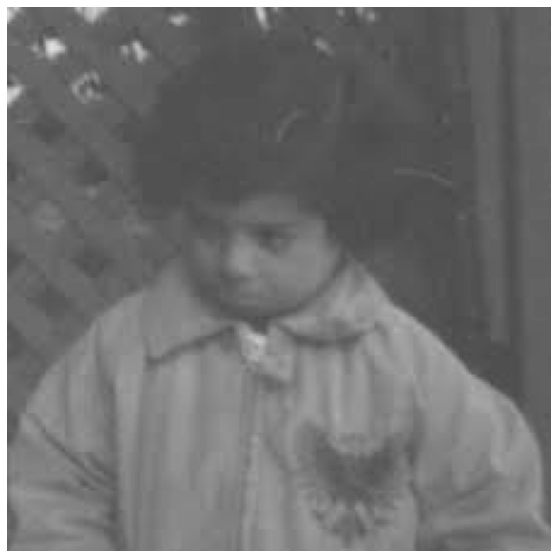

In [34]:
# leer imagen
img = cv2.imread('tarea_01//images//old.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# mostrar imagen
fig = plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')


Como se puede observar, esta imagen posee un muy bajo contraste. Claramente los valores en la imagen no utilizan todo el rango de intensidades `[0, 255]`. Para corregir esto, se puede aplicar una transformación lineal punto a punto.

(a) Analice el histograma de la imagen y determine el rango de intensidades contenido esta (obtenga los valores `min` y `max` correspondientes). Luego, considerando estos límites (`v_min` y `v_max`), aplique la transformación `stretching`:

`new_px = 255*(px - v_min)/(v_max - v_min)`

sobre cada uno de los pixeles en la imagen y visualice el resultado.

TIP: Al operar numéricamente los valores de una imagen `np.uint8`, suele convenir transformar esta a valores punto flotante `np.float32`.

(-0.5, 224.5, 224.5, -0.5)

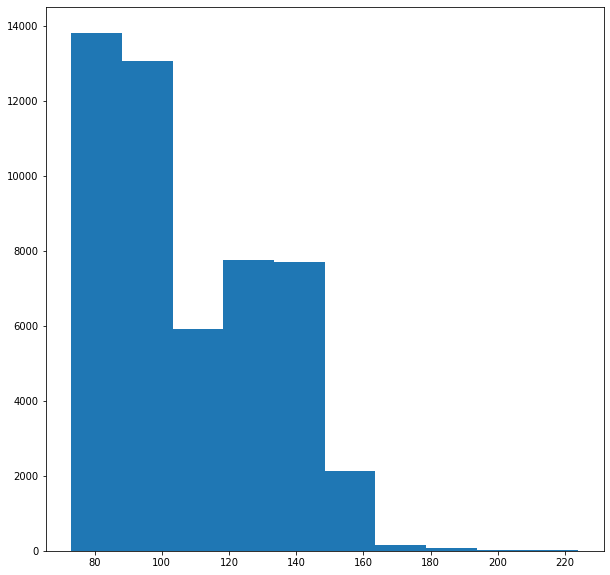

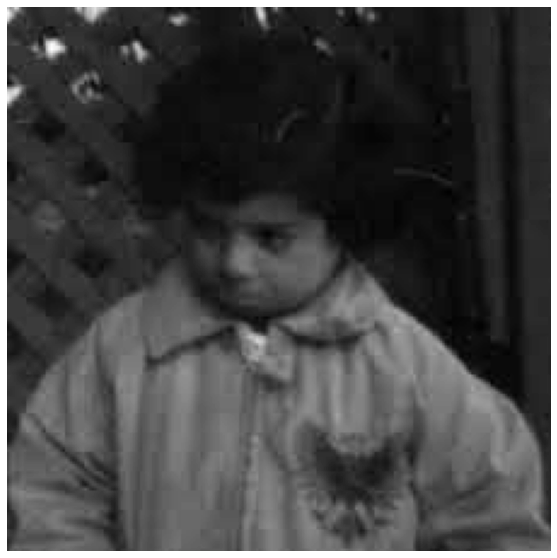

In [93]:
# RESPUESTA PREGUNTA 1 PARTE 2.a

# leer imagen

img = cv2.imread('tarea_01//images//old.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# transformar imagen a np.float32

img = img.astype(np.float32)

# plotear histograma de la imagen

flat = img.flatten()
fig = plt.figure(figsize=(10, 10))
plt.hist(flat)

# defina valores v_min y v_max (puede utilizar np.min y np.max si lo prefiere)

v_min = np.min(img)
v_max = np.max(img)

# transformar imagen

for i in range(img.shape[0]):
  for j in range(img.shape[1]):

    # aplicar transformación
    img[i, j] = 255*(img[i, j] - v_min)/(v_max - v_min)

# transformar imagen a np.uint8

img = img.astype(np.uint8)

# mostrar imagen

fig = plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')



(b) Siguiendo el mismo procedimiento, normalice los valores de intensidad de la imagen entre `[0, 1]` y luego aplique la transformación:

`new_px = log( px + alpha )`

sobre la imagen. Puede que sea necesario aplicar un último streching al rango `[0, 255]` posterior a la transformación.

¿Cuales son los efectos de esta operación? ¿Por qué se necesita el parámetro  `alpha` y como afecta este los resultados? ¿Cual es
un valor adecuado para `alpha`? Muestre los resultados.




(-0.5, 224.5, 224.5, -0.5)

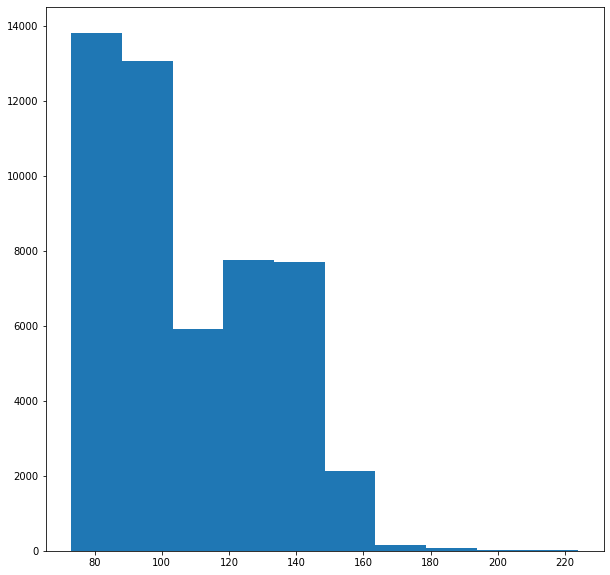

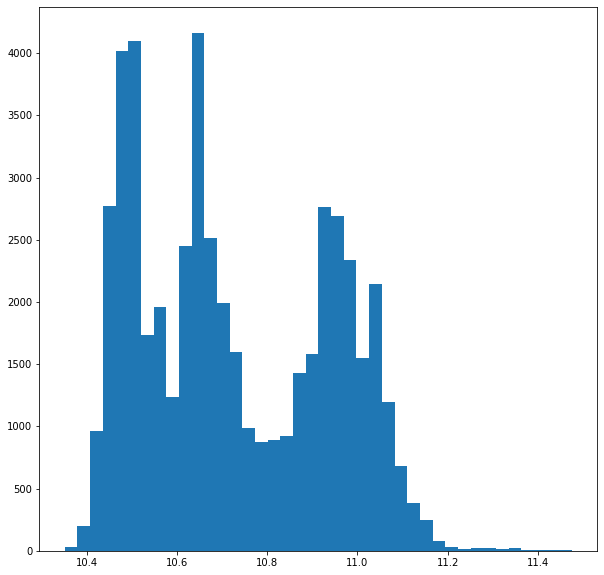

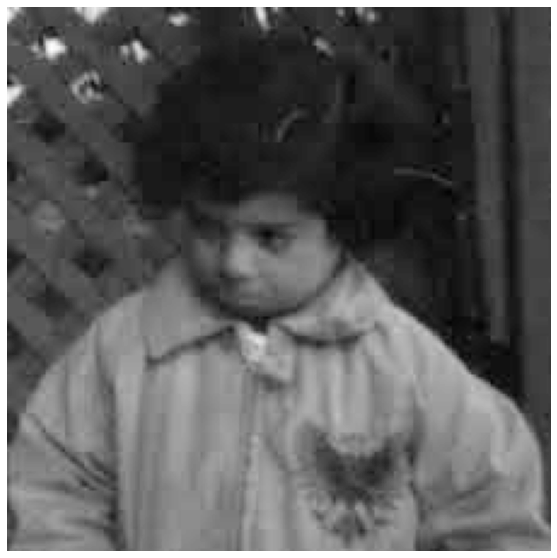

In [94]:
# RESPUESTA PREGUNTA 1 PARTE 2.b

# leer imagen

img = cv2.imread('tarea_01//images//old.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# transformar imagen a np.float32

img=img.astype(np.float32)

# plotear histograma de la imagen

flat = img.flatten()
fig = plt.figure(figsize=(10, 10))
plt.hist(flat)

# normalizar imagen (stretch entre 0 y 1)

v_min = np.min(img)/255
v_max = np.max(img)/255

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    img[i, j] = 255*(img[i, j] - v_min)/(v_max - v_min)

# transformar imagen
alpha = 0.05

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    img[i, j] = np.log( img[i, j] + alpha)

# plotear histograma de la imagen transformada

flat = img.flatten()
fig = plt.figure(figsize=(10, 10))
plt.hist(img.flatten(), 40)


# normalizar imagen (stretch entre 0 y 255)

v_min = np.min(img)
v_max = np.max(img)

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    img[i, j] = 255*(img[i, j] - v_min)/(v_max - v_min)

# transformar imagen a np.uint8

img = img.astype(np.uint8)

# mostrar imagen
fig = plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
plt.axis('off')

## Parte 3

Considere la imagen de monedas `coins.png`. Se desea elaborar un algoritmo que permita clasificar cada una de las monedas de acuerdo a su tamaño. En la parte 1 de este problema se vio como es posible segmentar los cuerpos de una imagen mediante la binarización adecuada de esta.

In [ ]:
# leer imagen
img = cv2.imread('tarea_01//images//coins.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(10, 10))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

# binarizar con cv2.inRange (los valores de la máscara deben estar entre 0 y 1)
mask = cv2.inRange(img_gray, 90, 255)
mask = mask/255

fig = plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')
plt.axis('off')

No obstante, esto no permite aislar cada una de las monedas por si sola ya que estas son relativamente del mismo color (o máás bien, tonalidad de gris). Para resolver esto, se puede utilizar el algoritmo `Connected Componentes` (implementado en `cv2.connectedComponents`) el cual, a partir de una imagen binarizada etiqueta cada uno de los cuerpos presentes. Esto último permite acceder a cada uno de los cuerpos mediante su etiqueta.

In [ ]:
# leer imagen
img = cv2.imread('tarea_01//images//coins.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# binarizar con cv2.inRange (los valores de la máscara deben estar entre 0 y 1)
mask = cv2.inRange(img_gray, 90, 255)/255
mask = np.uint8(mask)

fig = plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')
plt.axis('off')

# etiquetar mediante connected components
# retorna cantidad de cuerpos identificados y una imagen con las etiquetas
num_coins, labels = cv2.connectedComponents(mask)

print('monedas identificadas: {:d}'.format((num_coins - 1)))

fig = plt.figure(figsize=(10, 10))
plt.imshow(labels, cmap='jet')
plt.axis('off')

# acceder a moneda con etiqueta 6
coin_6 = np.uint8( labels==6 )

fig = plt.figure(figsize=(10, 10))
plt.imshow(coin_6, cmap='gray')
plt.axis('off')



(a) Utilizando un `for loop` itere sobre las monedas y clasifiquelas a partir de su tamaño (note que puede hacer esto a partir de su área o cantidad de piexeles), genere una imagen con las monedas grandes y otra con las monedas pequeñas.

In [ ]:
# RESPUESTA PREGUNTA 1 PARTE 3

# leer imagen
img = cv2.imread('tarea_01//images//coins.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# binarizar con cv2.inRange (los valores de la máscara deben estar entre 0 y 1)
mask = cv2.inRange(img_gray, 90, 255)/255
mask = np.uint8(mask)

# etiquetar mediante connected components
num_coins, labels = 

# inicializar imágenes de monedas pequeñas y grandes
small_coins = np.zeros_like(mask)
big_coins = np.zeros_like(mask)

# para cada una de las etiquetas identificadas
for i in np.arange(num_coins):
  
  # si el área de la moneada coin_i corresponde a moneda pequeña

    # agregar mask a small_coins (sume las imágenes)

  # else

    # agregar mask a big_coins (sume las imágenes)


# visualizar resultados
fig = plt.figure(figsize=(10, 10))
plt.imshow(small_coins, cmap='gray')
plt.axis('off')

fig = plt.figure(figsize=(10, 10))
plt.imshow(big_coins, cmap='gray')
plt.axis('off')



# Problema 2
La empresa de manufactura NERV S.A, dedicada al mecanizado y corte de piezas metálicas, ha decidido automatizar su sistema de control de calidad con el fin de acelerar la producción y reducir el número de piezas defectuosas en la línea de ensamblaje. Por esta razón, se le ha encargado a usted desarrollar un sistema de visión computacional que permita identificar aquellas piezas cuyas medidas escapen de las tolerancias especificadas.

La pieza que actualmente se encuentra en producción corresponde a la pieza en aluminio mostrada en la imagen `part_ref.png`.

(-0.5, 1116.5, 837.5, -0.5)

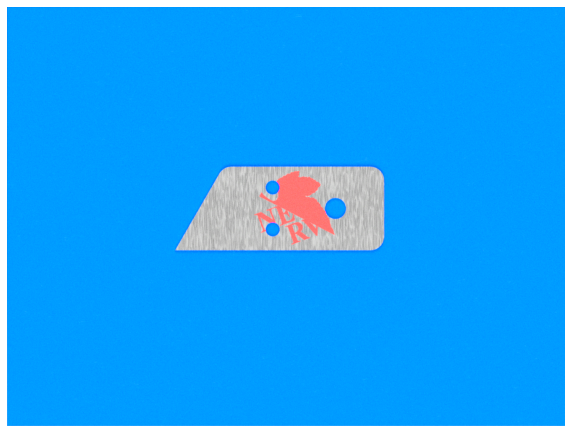

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# leer imagen
img = cv2.imread('tarea_01//images//part_ref.png')

# transformar a RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# mostrar imagen
fig = plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')

Durante la inspección de calidad solo se ha de revisar:
- **El ángulo del corte oblicuo de la izquierda.**
- **La posición de las dos perforaciones de la izquiera respecto a la perforación de la derecha.**

Las especificaciones de estas medidas se presentan en la imagen `part_spec.png`. Notar que las tolerancias se presentan en **porcentajes**.

## Parte 1
Dado que en la línea de ensamblaje vienen muchas piezas juntas, es necesario segmentar y etiquetar cada una de éstas para luego aislarlas y procesarlas individualmente. Esto se conoce como `masking`, pues es generar una máscara para cada una de las piezas.

Considerando la imagen `batch_1.png`, escriba el código necesario para cumplir lo anterior. En particular, se espera que el resultado de este proceso sea una matriz `labels` (`np.array`), de las mismas dimensiones de la imagen, que contenga las etiquetas de cada uno de los pixeles en la imagen. Así, al escribir:

`part_1 = np.uint8( (labels==1)*255 )`

`plt.imshow(part_1, cmap='gray')`

Se obtiene la imagen `result_part_1.png`.

TIP: utilice `cv2.connectedComponents` y note que el fondo de la imagen es de color azul.

In [ ]:
## RESPUESTA PREGUNTA 2 PARTE 1

# leer imagen
img = cv2.imread('tarea_01//images//batch_1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# segementar/binarizar respecto al background


# etiquetar mediante connected components


# visualizar pieza número 1
part_1 = np.uint8( (labels==1)*255 )

fig = plt.figure(figsize=(10, 10))
plt.imshow(part_1, cmap='gray')
plt.axis('off')

## Parte 2
Habiendo identificado cada una de las piezas mediante una etiqueta, ahora es posible procesarlas por separado.

En primer lugar, procese la imagen tal de obtener los bordes de la pieza como en la imagen a continuación. Pruebe con los algoritmos de detección de bordes `cv2.Sobel` y `cv2.Canny`, y comente cúal de estos funciona mejor.

TIP: puede consultar el funcionamiento de estas funciones en la documentación de OpenCV.

TIP2: puede serle útil la función `cv2.bitwise_or` para combinar imágenes binarias.

In [ ]:
## RESPUESTA PREGUNTA 2 PARTE 2

# sobel (cv2.Sobel)


fig = plt.figure(figsize=(10, 10))
plt.imshow(edge_sobel, cmap='gray')
plt.axis('off')

# canny (cv2.Cobel)


fig = plt.figure(figsize=(10, 10))
plt.imshow(edge_canny, cmap='gray')
plt.axis('off')

## Parte 3.1
Con los bordes de la pieza aislados, se pueden aplicar las transformadas de Hough para reconocimiento geométrico. Complete la implementación de la transformada de Hough de rectas (`myHough(part_edges)`) para obtener el ángulo de corte de la pieza.

In [ ]:
## RESPUESTA PREGUNTA 2 PARTE 3.1

def myHough(part_edges):
    """
    -> float
    
    Obtiene el ángulo de corte de la pieza a partir de los bordes de esta.
    
    :param np.array part_edges:
        imagen binaria que contiene los bordes de la pieza a analizar.
    
    :returns:
        ángulo de corte izquierdo.
    """

    # inicilizar matriz H del espacio de Hough
    m = np.linspace(-8, 8, 300)
    n = np.linspace(-100, 600, 900)

    H = np.zeros( (m.size, n.size) )

    # por cada pixel (i, j) en la imagen part_edges

      # si part_edges(i, j) = 1 (borde)

          # para cada pendiente m_i dentro del espacio de Hough
          for m_i in m:

              # calcular valor n_i correspondiente

              # si n_i se encuentra dentro del espacio de Hough
              if (n_i > -100) and (n_i < 600):

                # obtener indices m_idx y n_idx correspondientes
                # para asignar voto
                n_idx = np.argmin( abs(n - n_i) )
                m_idx = np.argmin( abs(m - m_i) )

                # agregar voto a H[m_idx, n_idx]
                H[m_idx, n_idx] = H[m_idx, n_idx] + 1


    # segmentar puntos en H con mayor cantidad de votos


    # calcular ángulos a partir de cada uno de estos puntos (usar pendientes)


    # retornar promedio de los ángulos obtenidos


# probar función
cut_angle = myHough(edge_canny)

print('ángulo de corte identificado: {:f} grados.')

## Parte 3.2

OpenCV también contiene implementaciones de las transformadas de Hough: `cv2.HoughLines` y `cv2.HoughCircles`. Utilizando estos algoritmos, obtenga el ángulo del corte izquierdo y las posiciones de las tres perforaciones. Puede usar `result_part_3.png` como referencia.

In [ ]:
## RESPUESTA PREGUNTA 2 PARTE 3.2

# aplicar transformada de Hough (cv2.HoughLines)
lines = 

# obtener ángulo de corte
cut_angle = []
# para cada una de las líneas detectadas
for line in lines:
  rho, theta = line[0]

  # si el ángulo es cercano a 30°
  if abs(theta*180/np.pi - 30.0) < 20.0:

    # agregar ángulo a la lista (en grados)
    cut_angle.append( theta*(180/np.pi) )

# promediar resultado y obtener estimación de ángulo
cut_angle = 

# transformada hough circulos (cv2.HoughCircles)
circles =

# separar perforaciones
perf_izq = []
perf_der = []
for c in circles[0]:

    # si es de las perforaciones menores (radio < 15px)
    if c[2] < 15:
        perf_izq.append( list(c) )

    # si es la perforación mayor   
    else:
        perf_der = c

## Parte 4
Ahora que ha logrado obtener las medidas de una pieza, repita el proceso anterior con la imagen `part_ref.png` para obtener las medidas de referencia. Luego, implemente la función `detect_faulty_parts(img)` que, tomando como input una imagen como `batch_1.png`, detecte las piezas defectuosas en la imagen y ponga una máscara roja sobre éstas como en la imagen a continuación (`result_part_4.png`).

In [ ]:
## RESPUESTA PREGUNTA 2 PARTE 4

def detect_faulty_parts(img):
    """
    -> Image (np.array)
    Detecta en la imagen aquellas piezas que no cumplan con las especificaciones de diseño.
    
    :param np.array img:
        imagen en RGB que contiene las piezas a analizar.
    
    :returns:
        imagen con las piezas defectuosas identificadas con rojo.
    """
    # segementar/binarizar respecto al background (parte 1)

    mask = 

    # inicializar imágen que contendrá las máscaras de las piezas malas
    faulty_parts = np.zeros_like(mask)

    # etiquetar mediante connected components (parte 1)
    num_parts, labels = cv2.connectedComponents(mask)

    # procesar cada una de las piezas en la imagen
    for i in range(1, num_parts):

      # separar pieza
      part_img = (labels == i)*255
      part_img = np.uint8(part_img)

      # obtener bordes/edges (parte 2)
      edges = 

      # aplicar transformada de Hough de rectas y obtner ángulo de corte (parte 3)
      cut_angle =

      # aplicar transformada de Hough de circulos y obtener dimensiones perfs. (parte 3)


      # checkear cumplimiento especificaciones
      # (ejemplo, suponer que piezas están correctas)
      VALID_PART = True
        
      try:
        # si ángulo de corte está fuera de la tolerancia
        assert abs( cut_angle - 60 ) < 60*0.05

        # aquí va el resto de condiciones...
      
      except AssertionError:
        # pieza está mala
        VALID_PART = False
      
      # si la pieza está defectuosa
      if not(VALID_PART):
        faulty_parts = faulty_parts + part_img

    # aplicar máscara roja (faulty_parts) sobre la imagen original
    res = 

    return res


# probar la función
test_batch = cv2.imread('tarea_01//images//batch_1.png')
test_batch = cv2.cvtColor(test_batch, cv2.COLOR_BGR2RGB)

ret = detect_faulty_parts(test_batch)

fig = plt.figure(figsize=(10, 10))
plt.imshow(ret)
plt.axis('off')

## Parte 5
Dado el buen funcionamiento de su sistema, la gerencia ha decidido combinar la línea de ensamblaje actual con la del nuevo modelo. Estas últimas presentan el nuevo logo de la empresa y siguen especificaciones distintas a la del antiguo modelo.

Utilizando SIFT (`cv2.xfeatures2d.SIFT_create`), modifique la función `detect_faulty_parts(img)` tal que se detecte el modelo de cada pieza y se analicen únicamente las del modelo antiguo. Puede copiar la función anterior y agregar un bloque en el que se identifique el logo de la pieza, si la pieza es del modelo nuevo puede utilizar `continue` para saltar a la siguiente pieza en el `for`.

In [ ]:
## RESPUESTA PREGUNTA 2 PARTE 5

def detect_faulty_parts_2(img):
    """
    -> Image (np.array)
    Detecta en la imagen aquellas piezas que no cumplan con las especificaciones de diseño.
    
    :param np.array img:
        imagen en RGB que contiene las piezas a analizar.
    
    :returns:
        imagen con las piezas defectuosas identificadas con rojo.
    """

    # segementar/binarizar respecto al background (parte 1)
    mask = 

    # inicializar imágen que contendrá las máscaras de las piezas malas
    faulty_parts = np.zeros_like(mask)

    # etiquetar mediante connected components (parte 1)
    num_parts, labels = cv2.connectedComponents(mask)

    # segmentar logos rojos desde la imagen original
    logos = 

    # procesar cada una de las piezas en la imagen
    for i in range(1, num_parts):

      # aislar pieza y logo correspondiente
      part_img = 
      part_logo = np.multiply(logos, part_img)

      # checkear si el logo es del modelo antiguo

      # obtener descriptores referencia mediante sift.detectAndCompute
      ref = cv2.imread('tarea_01//images//old_model_logo.png')
      ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
      kp_ref, des_ref = 

      # obtener descriptores del logo mediante sift.detectAndCompute
      kp_logo, des_logo = 

      # realizar brute force matching entre los descriptores
      matches = 
      
      # filtrar buenos matches
      good_matches = 

      # si no hay matches (no es logo antiguo
      if len(good_matches) < 20:
          continue

      # obtener bordes/edges (parte 2)
      edges = 

      # aplicar transformada de Hough de rectas y obtner ángulo de corte (parte 3)
      cut_angle =

      # aplicar transformada de Hough de circulos y obtener dimensiones perfs. (parte 3)

      # checkear cumplimiento especificaciones
      # (ejemplo, suponer que piezas están correctas)
      VALID_PART = True
        
      try:
        # si ángulo de corte está fuera de la tolerancia
        assert abs( cut_angle - 30 ) < 60*0.05

        # aquí va el resto de condiciones...
      
      except AssertionError:
        # pieza está mala
        VALID_PART = False
      
      # si la pieza está defectuosa
      if not(VALID_PART):
        faulty_parts = faulty_parts + part_img

    # aplicar máscara roja (faulty_parts) sobre la imagen original
    res = 

    return res

# probar la función
test_batch = cv2.imread('tarea_01//images//batch_2.png')
test_batch = cv2.cvtColor(test_batch, cv2.COLOR_BGR2RGB)

ret = detect_faulty_parts_2(test_batch)

fig = plt.figure(figsize=(10, 10))
plt.imshow(ret)
plt.axis('off')